In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# Ladder

In [3]:
def invert (X):
    for i in range(len(X)):
        X[i] = - X[i]
    return X

In [4]:
def graph(X1, Y1, X2, Y2, X3, Y3, X4, Y4, X5, Y5, X6, Y6):
    plt.figure(figsize=(10, 6))
    
    fig, ax = plt.subplots(nrows= 1, ncols=1)
    plt.plot(invert(X1), Y1, label='53.5mV', linewidth=0.8)
    ax.scatter(X1, Y1)

    plt.plot(invert(X2), Y2, label='54mV', linewidth=0.8)
    ax.scatter(X2, Y2)

    plt.plot(invert(X3), Y3, label='54.5mV',linewidth=0.8)
    ax.scatter(X3, Y3)
    
    plt.plot(invert(X5), Y5, label='55mV',linewidth=0.8)
    ax.scatter(X5, Y5)
    
    plt.plot(invert(X6), Y6, label='55.5mV',linewidth=0.8)
    ax.scatter(X6, Y6)

    ax.set_yscale ("log")
    ax.set_xlabel("Threshold[mV]")
    ax.set_ylabel("Log(Frequency[kHz])")
    ax.legend()
    plt.grid()
    plt.savefig("Staircase_Finale.png")
    plt.show()
   

In [5]:
def cut_0(X, Y):
    X1 = []
    Y1 = []
    for i in range(len(X)):
        if X[i] != 0:
            X1.append(X[i])
            Y1.append(Y[i])
    return Y1, X1

<Figure size 1000x600 with 0 Axes>

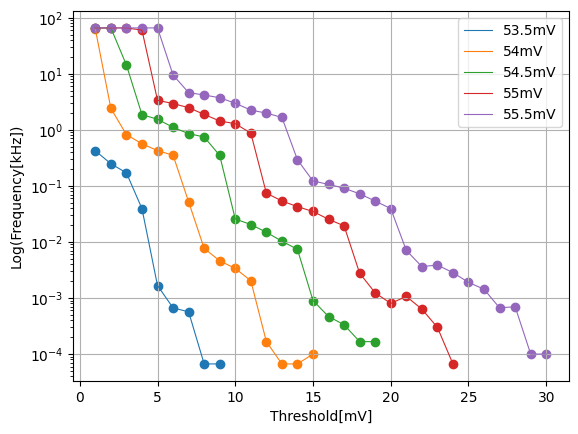

In [6]:
Z = pd.read_csv(r"Analisi/Parte 1/Analisi Dark_Ladder/staircase_plot_bello.CSV")
Y = Z["Th [mV] V_B 53_5V "]
K1 = cut_0(Z["F [kHz] V_B 53_5V"], Y)
K2 = cut_0(Z["F [kHz] V_B 54V"], Y)
K3 = cut_0(Z["F [kHz] V_B 54_5V"], Y)
K4 = cut_0(Z["F [kHz] V_B 55V"], Y)
K5 = cut_0(Z["F [kHz] V_B 55_5V"], Y)
K6 = cut_0(Z["F [kHz] V_B 56V"], Y)


graph(K1[0], K1[1], K2[0], K2[1], K3[0], K3[1], K4[0], K4[1], K5[0], K5[1], K6[0], K6[1])

# Crosstalk

In [7]:
Err = (2.47573/100)*np.array([K2[1][10], K2[1][5], K3[1][12], K3[1][6], K5[1][15], K5[1][7], K6[1][17], K6[1][10]])

'ASSOCIO I VALORI DI ERRORE AGLI X CORRISPONDENTI'

'ASSOCIO I VALORI DI ERRORE AGLI X CORRISPONDENTI'

In [8]:
# ct_53_5 difficilmente distinguibile

ct_54 = K2[1][10] / K2[1][5]
err_54 = np.sqrt((Err[0]/K2[1][5])**2 + (K2[1][10]*Err[1])**2/K2[1][5]**4)

ct_54_5 = K3[1][12] / K3[1][6]
err_54_5 = np.sqrt((Err[2]/K3[1][6])**2 + (K3[1][12]*Err[3])**2/K3[1][6]**4)

ct_55 = K5[1][14] / K5[1][7]
err_55 = np.sqrt((Err[4]/K5[1][7])**2 + (K5[1][14]*Err[5])**2/K5[1][7]**4)

ct_55_5 = K6[1][17] / K6[1][10]
err_55_5 = np.sqrt((Err[6]/K6[1][10])**2 + (K6[1][17]*Err[7])**2/K6[1][10]**4)


x = np.array([54, 54.5, 55, 55.5])
y = np.array([ct_54, ct_54_5, ct_55, ct_55_5])
#yer = [.001 for i in range(len(x))] 
#yer = np.array([0.008, 0.008, 0.008, 0.008])  # Errore relativo costante per tutti i punti
yer = [err_54, err_54_5, err_55, err_55_5]

vbr = 52

print (y)
print (yer)

[0.00577105 0.01206418 0.01857836 0.03212344]
[np.float64(0.0002020564990015281), np.float64(0.00042239244091855986), np.float64(0.0005683510172648578), np.float64(0.0011247095681595008)]


In [9]:
def exp(x, a, b):
    return a *(1 - np.exp(x * b))

pars, vals, ers, *other = LS_fit(x, y, yer, exp, a=1, b=1, disp=1)

for i in range(len(pars)):
    print(f"Parameter {pars[i]}: {vals[i]:.3g} ± {ers[i]:.3g}")

c2r = other[2] / other[1]
print(f"Chi2/ndf: {c2r:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.37 (χ²/ndof = 16.7)     │              Nfcn = 76               │
│ EDM = 1.84e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │-38.792741e-27│0.000017e-27│            │            │         │         │       │
│ 1 │ b    │990.858771e-3│0.000008e-3│            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────────────────┐
│   │                                a                                b │
├───┼───────────────────────────────────────────────────────────────────┤
│ a │                         2.95e-64 -138.94971964205763015343109e-42 │
│ b │ -138.94971964205763015343109e-42                         6.56e-17 │
└───┴───────────────────────────────────────────────────────────────────┘

Parameter a: -3.88e-26 ± 1.72e-32
Parameter b: 0.991 ± 8.1e-09
Chi2/ndf: 16.7


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\matte\AppData\Local\Temp\ipykernel_14180\1051929954.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(t-vbr, exp(np.array(t), *vals), label='Fit, $\\tilde{\chi}^2$ = 1.4', color='red')


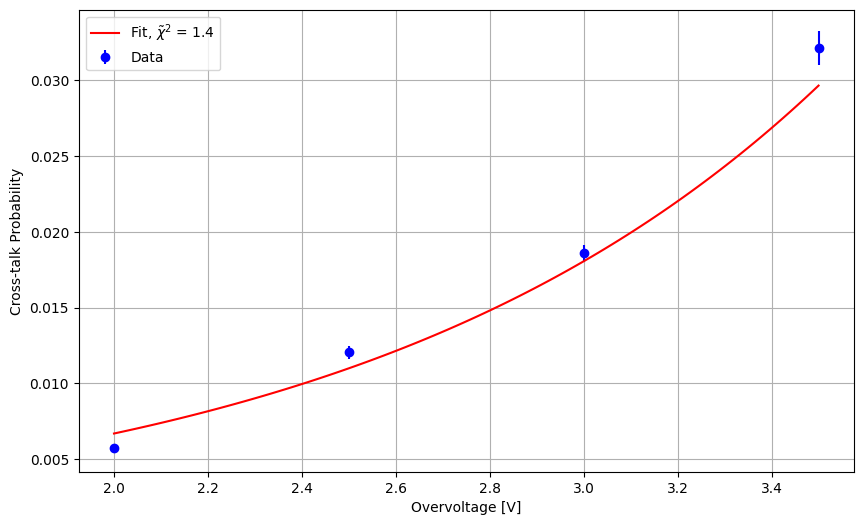

In [10]:
t = np.linspace(54, 55.5, 100)
plt.figure(figsize=(10, 6))
plt.errorbar(x-vbr, y, yerr=yer, fmt='o', label='Data', color='blue')
plt.plot(t-vbr, exp(np.array(t), *vals), label='Fit, $\\tilde{\chi}^2$ = 1.4', color='red')
plt.xlabel('Overvoltage [V]')
plt.ylabel('Cross-talk Probability')
plt.grid()
plt.legend()
plt.savefig("Cross_talk_fit.png")
plt.show()

# Save the fit parameters to a file

In [11]:
def exp_squared (x, b, a):
    return (1 - a *np.exp(-b*(x)**2 ))

pars2, vals2, ers2, *other2 = LS_fit(x - vbr, y, yer, exp_squared, b=1, a = 1, disp=1)

for i in range(len(pars2)):
    print(f"Parameter {pars2[i]}: {vals2[i]:.3g} ± {ers2[i]:.3g}")

c2r2 = other2[2] / other2[1]
print(f"Chi2/ndf: {c2r2:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.15 (χ²/ndof = 6.6)      │              Nfcn = 81               │
│ EDM = 2.36e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │  2.87e-3  │  0.09e-3  │            │            │         │         │       │
│ 1 │ a    │  1.0058   │  0.0005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        b        a │
├───┼───────────────────┤
│ b │ 8.36e-09    42e-9 │
│ a │    42e-9 2.42e-07 │
└───┴───────────────────┘

Parameter b: 0.00287 ± 9.14e-05
Parameter a: 1.01 ± 0.000491
Chi2/ndf: 6.57


<ValueView b=0.00286972706238589 a=1.0057775224452334>


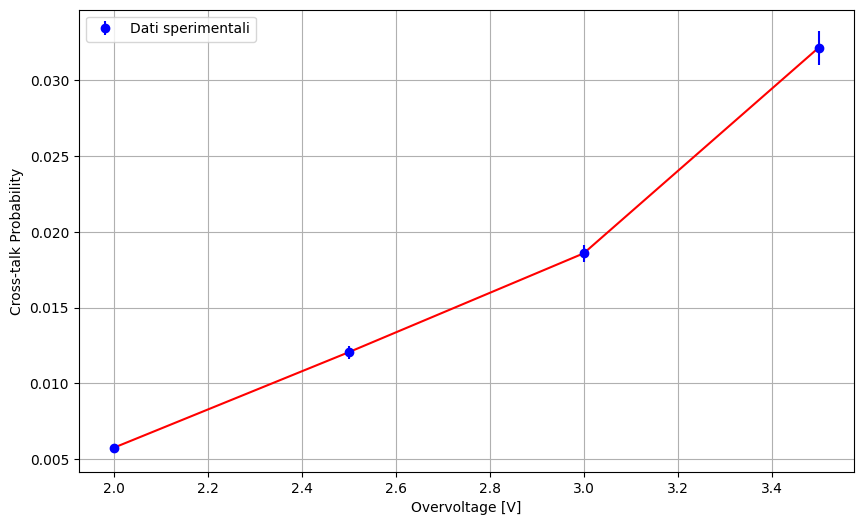

In [15]:
print(vals2)


t = np.linspace(54, 55.5, 100)
plt.figure(figsize=(10, 6))
plt.errorbar(x-vbr, y, yerr=yer, fmt='o', label='Dati sperimentali', color='blue')
plt.plot(x - vbr, y, color = 'red' )
#plt.plot(t-vbr, exp_squared(np.array(t - vbr), *vals2), label=fr'Fit, $\tilde\chi^2$ = {c2r2:.3g}', color='red')
plt.xlabel('Overvoltage [V]')
plt.ylabel('Cross-talk Probability')
plt.grid()
plt.legend(loc = 'upper left')
plt.savefig("Cross_talk_andamento.png")
plt.show()